## 8. Feladatsor (lineáris többlépéses módszerek: implementáció et al.)

**Differenciálegyenlet**

Most is csak autonóm egyenletekkel foglalkozunk, azaz legyen a kezdetiérték-problémánk

$$ 
\begin{cases}
\dot x(t) &= f(x(t)), \\
x(0) &= x_0. \\
\end{cases}
$$

A feltevésünk miatt a kezdeti időpont persze nem számít, lehet $0$.

**A(z állandó lépéshosszú) lineáris többlépéses módszerek általános alakja**

Tegyük fel, hogy rendelkezésünkre állnak az $y_{n-s}, \ldots, y_{n-1}$ értékek, melyek közelítik az $x((n-s)h), \ldots, x((n-1)h)$ értékeket. 

Ekkor egy $s$-lépéses ($s \in \mathbb{N}_{\neq 0}$) lineáris többlépéses módszer általános alakja az $nh$ időponthoz tartozó $y_n$ numerikus közelítés kiszámításához a következő:

$$ \sum\limits_{j=0}^{s} \alpha_j y_{n-j} = h\sum\limits_{j=0}^{s} \beta_j f_{n-j}.$$

A formula így még nem egyértelmű, ezért fel szokás tenni, hogy (pl.) $\alpha_{0} = 1$. 

Ha $\beta_0 = 0$, akkor a módszer explicit, egyébként implicit. 

A módszercsaládra magyarul az LTM betűszót használhatjuk, angolul pedig az LMM-et.

---

### 1. Feladat

Implementáljuk az explicit Adams-módszerek időlépését.

In [4]:
# AB2 (ketlepeses Adams-Bashfort)
#
# y_2 - y1 = h(3/2 f(y1) - 1/2 f(y_0)

alphas = [1, -1]
betas = [3/2, -1/2]

function ab2_step(f, h, y0, y1)
    # y2 az uj numerikus kozelito ertek
    y2 = y1 + h*(3/2 * f(y1) - 1/2*f(y0))
    
    return y2
end

ab2_step (generic function with 1 method)

In [18]:
# nezzuk meg hogy ez mit csinal a \dot x = x feladaton

# y1 = ???
#
# cel: y1 legyen jo kozelitese a pontos megoldasnak 
# x(t_0) = x(0) ~= y_0
# x(t_0 + h) = x(h) ~= y_1
#
# tegyunk y0-bol 100 darab EE lepest (h=0.001)-gyel.
y0 = 1
y1 = (1 + 0.001)^100 * y0

1.105115697720756

In [19]:
exp(0)

1.0

In [20]:
exp(0.1)

1.1051709180756477

In [37]:
# kozelito ertek 0-ban, 0.1-ben -> kozelito ertek 0.2-ben
ab2_step(x -> x^2, 0.1, y0, y1)

1.2383078035230808

In [38]:
# ab_2 eseten y0 = y0
# ab_2 eseten fs = [f0, f_{-1}]
function ab_step(betas, f, h, y0, fs)
    # y0: elozo numerikus kozelites
    # fs: s hosszu vektor
    
    return y0 + h*(fs' * betas)
end

ab_step (generic function with 1 method)

In [40]:
betas = [3/2, -1/2]
f(x) = x^2

ab_step(betas, f, 0.1, y1, [f(y1), f(y0)])

1.2383078035230808

In [41]:
ab2_step_(f, h, y0, fs) = ab_step([3/2, -1/2], f, h, y0, fs)

ab2_step_ (generic function with 1 method)

In [42]:
ab2_step_(f, 0.1, y1, [f(y1), f(y0)])

1.2383078035230808

**LTM indítás**

Adott s-lépéses p-edrendű LTM esetén hogyan kellene meghatározni az $y_0, \ldots, y_{s-1}$ értékeket?

$y_0$ az adott $x_0$ kezdetiérték (numerikus hibával terhelten pl. $x(0) = \sin(3)$).

$y_1, \ldots, y_{s-1} = ?$

a) Indítsunk $p-$edrendű RK módszerrel.

b) 
 * 1. lépést (h hosszú) AB1 módszerrel
 * 2. lépést (h hosszú) AB2 módszerrel
 * 3. lépést (h hosszú) AB3 módszerrel
 *    ...
 * s. lépést már a mi módszerünkkel

 c) mint a b) pontban, csak 
    h/2, h/4, ..., vagy h/32 hosszú lépésekből néhányat (pl. 2, 4, ... 32) - tehát alacsonyabb rendű módszerrel, kisebb lépéshosszokkal, több lépést

### 2. Feladat

Mérjük le az AB3 módszer rendjét a

$$
\begin{cases}
 \dot x &= 2x \quad [0,1]\text{-on} \\
 x(0) &= 1
 \end{cases}
$$

feladaton.

a) Az indításhoz használjuk az AB1 módszert

In [51]:
circshift([1,2,3], 1)

3-element Vector{Int64}:
 3
 1
 2

In [63]:
betas = [23/12, - 16/12, 5/12]

y0 = 1
h = 1e-6
f(x) = 2*x

y1 = ab_step([1], f, h, y0, [f(y0)])
y2 = ab_step([1], f, h, y1, [f(y1)])

# ciklus inditashoz szukseges dolgok
y = y2
fs = map(f, [y2, y1, y0])
t = 0
while t < 1
    y = ab_step(betas, f, h, y, fs)

    fs = circshift(fs, 1)
    fs[1] = f(y)
    
    t = t + h
end

y

7.389085655184748

In [64]:
exp(2)

7.38905609893065

b) Az indításhoz használjuk az AB1, majd az AB2 módszer 1-1 lépését.

In [68]:
function ab3_2(f, h, y0)
        
    y1 = ab_step([1], f, h, y0, [f(y0)])
    y2 = ab_step([3/2, -1/2], f, h, y1, [f(y1), f(y0)])
    
    # ciklus inditashoz szukseges dolgok
    y = y2
    fs = map(f, [y2, y1, y0])
    t = 0
    while t < 1
        y = ab_step(betas, f, h, y, fs)
    
        fs = circshift(fs, 1)
        fs[1] = f(y)
        
        t = t + h
    end

    return y
end

ab3_2 (generic function with 1 method)

In [69]:
ab3_2(f, h, y0)

7.389085655199557

In [71]:
-(6:12)

-6:-1:-12

3

In [79]:
using Plots

In [94]:
using Polynomials

In [131]:
# rendmeres

# bizonyos h-k eseten kiszamoljuk a numerikus megoldast, majd megnezzuk a hibat, hogy milyen fuggyvenye a h-nak

# h = 2^(-6), ..., 2^(-12)
e0 = 0.2

hs = 2.0 .^ (-(6:12))
errs = 0*hs
for j=1:length(hs)
    y = ab3_2(f, hs[j], y0)
    #errs[j] = y - exp(2)
    errs[j] = e0 * 0.5 ^ (2*j)
end

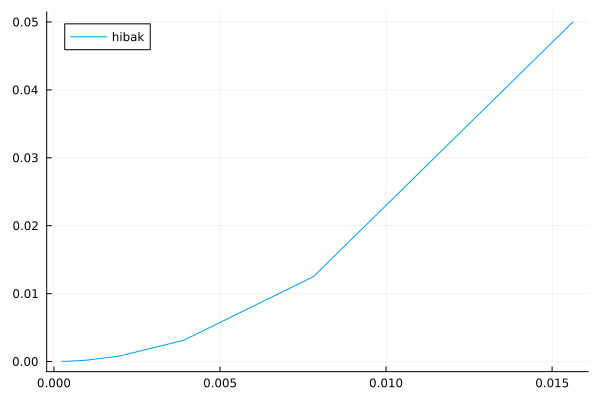

In [133]:
plot(hs, errs, label="hibak")

In [113]:
A = map( x-> x.^(0:4), hs)

7-element Vector{Vector{Float64}}:
 [1.0, 0.015625, 0.000244140625, 3.814697265625e-6, 5.960464477539063e-8]
 [1.0, 0.0078125, 6.103515625e-5, 4.76837158203125e-7, 3.725290298461914e-9]
 [1.0, 0.00390625, 1.52587890625e-5, 5.960464477539063e-8, 2.3283064365386963e-10]
 [1.0, 0.001953125, 3.814697265625e-6, 7.450580596923828e-9, 1.4551915228366852e-11]
 [1.0, 0.0009765625, 9.5367431640625e-7, 9.313225746154785e-10, 9.094947017729282e-13]
 [1.0, 0.00048828125, 2.384185791015625e-7, 1.1641532182693481e-10, 5.684341886080802e-14]
 [1.0, 0.000244140625, 5.960464477539063e-8, 1.4551915228366852e-11, 3.552713678800501e-15]

In [115]:
B = hcat(A...)' 
# Bc = y
# B'*Bc = B'y

7×5 adjoint(::Matrix{Float64}) with eltype Float64:
 1.0  0.015625     0.000244141  3.8147e-6    5.96046e-8
 1.0  0.0078125    6.10352e-5   4.76837e-7   3.72529e-9
 1.0  0.00390625   1.52588e-5   5.96046e-8   2.32831e-10
 1.0  0.00195312   3.8147e-6    7.45058e-9   1.45519e-11
 1.0  0.000976562  9.53674e-7   9.31323e-10  9.09495e-13
 1.0  0.000488281  2.38419e-7   1.16415e-10  5.68434e-14
 1.0  0.000244141  5.96046e-8   1.45519e-11  3.55271e-15

In [117]:
poly_coeffs = (B' * B) \ (B' * errs)

5-element Vector{Float64}:
   4.120130618725913e-15
  -9.747619973685255e-12
 204.80000000425972
  -5.572326367739815e-7
   2.070173048404856e-5

In [ ]:
# masodrendu :)

In [120]:
function polyval(coeffs, x)
    # normalegyenlet es kesz
    return coeffs' * (x.^ (0:(length(coeffs) - 1)))
end

polyval (generic function with 1 method)

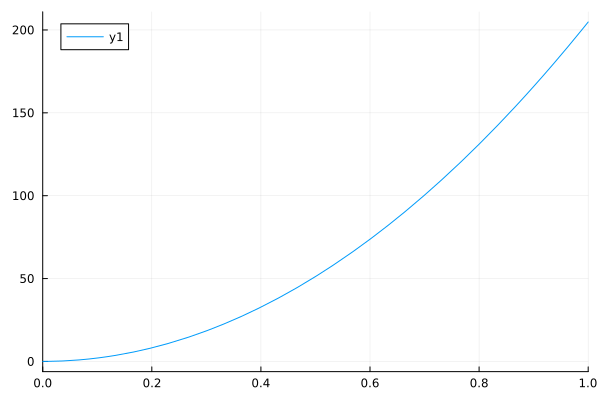

In [128]:
plot(x -> polyval(poly_coeffs, x), xlims=(0, 1))

### 3. Feladat

Alkalmazzuk az IE módszert az

$$
\begin{cases}
 \dot x &= x^2 \qquad [0,1]\text{-en} \\
 x(0) &= 1
\end{cases}
$$

feladatra.

In [148]:
# y1 = y0 + hf(y1)
# (I - hf)(y1) = y0
# y1 = (I - hf)^{-1}(y0)

# gyokkereses (vagy vmilyen vesztesegfuggveny minimalizalasa

f(x) = x^2
y0 = 1
h = 0.01

# y1 - y0 - hf(y1) = 0
root_me(x) = x - y0 - h*f(x)

root_me (generic function with 1 method)

In [149]:
import Pkg;
Pkg.add("Roots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [150]:
#matlab: fsolve

using Roots

In [151]:
y1 = find_zero(root_me, (1/2, 3/2))

y1

1.010205144336438

In [152]:
root_me(y1)

-1.0234868508263162e-16

In [159]:
function implicit_euler(f, h, y0)
    
    y = y0
    t = 0
    while t < 1
        root_me(x) = x - y - h*f(x)
        
        y = find_zero(root_me, 1, Order16())
        t = t + h
    end

    return y
end

implicit_euler (generic function with 1 method)

In [161]:
implicit_euler(x -> x, 0.001, 1)

2.7196422164428395

In [165]:
# a pontos numerikus megoldas:
#
# (1/(1 - 0.001))^1000

### 4. Feladat

Készítsünk egy Runge--Kutta módszert, mely a P(EC)^k ötletét használja fel.

In [ ]:
# Butcher-tablo
A = [0 0 0
     1 0 0
     0 1 0]

b  = [0 0 1]

Y1 = x0

P: Y2 = x0 + h*f(x0)
E: k2 = f(Y2)
C: Y3 = x0 + h*k2
E: k3 = f(Y3)

C: x1 = x0 + h*k3
